In [1]:
# -------- BIBLIOTEKI -------- 

from IPython.display import Markdown as md
import mercury as mr

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Zmienienie formatu zapisu danych numerycznych na dwie cyfry po przecinku.
pd.options.display.float_format = '{:.2f}'.format

#Wczytanie danych
df = pd.read_csv('insurance.csv')

In [2]:
app = mr.App(title="Prezentacja Projekt ML", description="Interaktywna aplikacja do prognozy progu ubezpieczenia") 

mercury.App

<center>
    <h1 style="color:#263a57; font-family:verdana;"> Jak kosztowne jest zdrowie? </h1>
    <h3> Interactive slides from notebook </h3>
    <h5> Gabriela Piwar </h5>
</center>

## Cel projektu

Określenie kosztów ubezpieczenia zdrowotnego na podstawie wybranych parametrów osobowych.

Stworzenie aplikacji do pomocy w wyznaczeniu progu ubezpieczenia.

## Zbiór danych

W projekcie wykorzystaliśmy zbiór danych 

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [4]:
# -------- ZMIANA ETYKIET -------- 

df = pd.read_csv('insurance.csv')

smoke = {'yes': 1,'no': 0}
sexes = {'female': 1,'male': 0}

print('Unique regions in dataset {}'.format(df.region.unique()))

df.smoker = [smoke[x] for x in df.smoker]
df.sex = [sexes[x] for x in df.sex]
df

Unique regions in dataset ['southwest' 'southeast' 'northwest' 'northeast']


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.92
1,18,0,33.77,1,0,southeast,1725.55
2,28,0,33.00,3,0,southeast,4449.46
3,33,0,22.70,0,0,northwest,21984.47
4,32,0,28.88,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,0,30.97,3,0,northwest,10600.55
1334,18,1,31.92,0,0,northeast,2205.98
1335,18,1,36.85,0,0,southeast,1629.83
1336,21,1,25.80,0,0,southwest,2007.94


## Zbiór danych

Zmiany etykiet smoker i sex na wartości 0 i 1

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.92
1,18,0,33.77,1,0,southeast,1725.55
2,28,0,33.00,3,0,southeast,4449.46
3,33,0,22.70,0,0,northwest,21984.47
4,32,0,28.88,0,0,northwest,3866.86


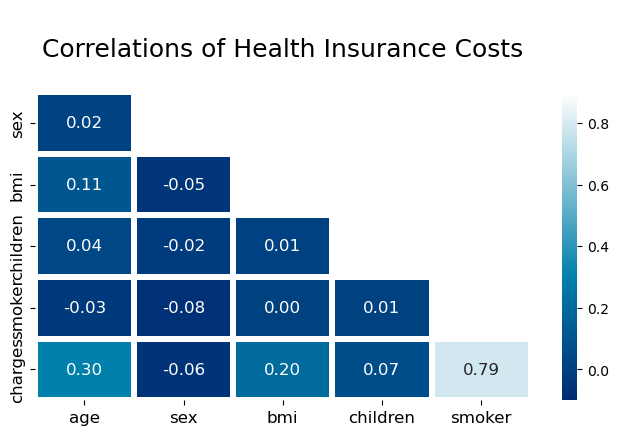

In [7]:
fig, ax = plt.subplots(figsize=(8,4))   

mask = np.triu(np.ones_like(df.corr(numeric_only = True), dtype=bool))[1:, :-1]
corr = df.corr(numeric_only = True).iloc[1:,:-1].copy()

ax = sns.heatmap(corr, mask=mask, vmin=-.1, vmax=.9, center=0, annot=True, fmt='.2f', 
               cmap ='ocean', linewidths=4, annot_kws={"fontsize":12})

ax.set_title('\nCorrelations of Health Insurance Costs\n', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.show()
#zapisanie obrazu jako png
fig.savefig('test.png', bbox_inches='tight')

## Macierz korelacji

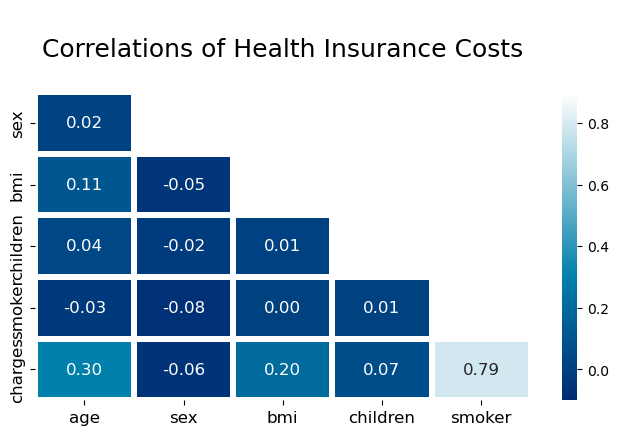

In [21]:
# add numeric widget AGE
age_input = mr.Slider(value=25, min = 18, max=70, label="Wiek", step=1)

mercury.Slider

In [20]:
# add numeric widget BMI
bmi_input = mr.Slider(value=20, min = 10, max=50, label="BMI", step=1)

mercury.Slider

In [24]:
# add checkbox
smoker_input = mr.Checkbox(value=True, label="Smoker")

mercury.Checkbox

In [25]:
import mercury as mr
 
# add select widget
sex_input = mr.Select(value="male", choices=['male', 'female'], label="Płeć")

mercury.Select